# 1.	Netflix Analysis

In [2]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('netflix daily top 10.csv')
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [3]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
#Checking shape
df.shape

(7100, 10)

In [5]:
#Checking columns
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [6]:
#Checking nun
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [7]:
#Checking unique
df['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

In [8]:
#Filling null value with No
df['Netflix Exclusive'].fillna('No', inplace=True)

Yes    4599
No     2501
Name: Netflix Exclusive, dtype: int64


<Axes: xlabel='Netflix Exclusive', ylabel='count'>

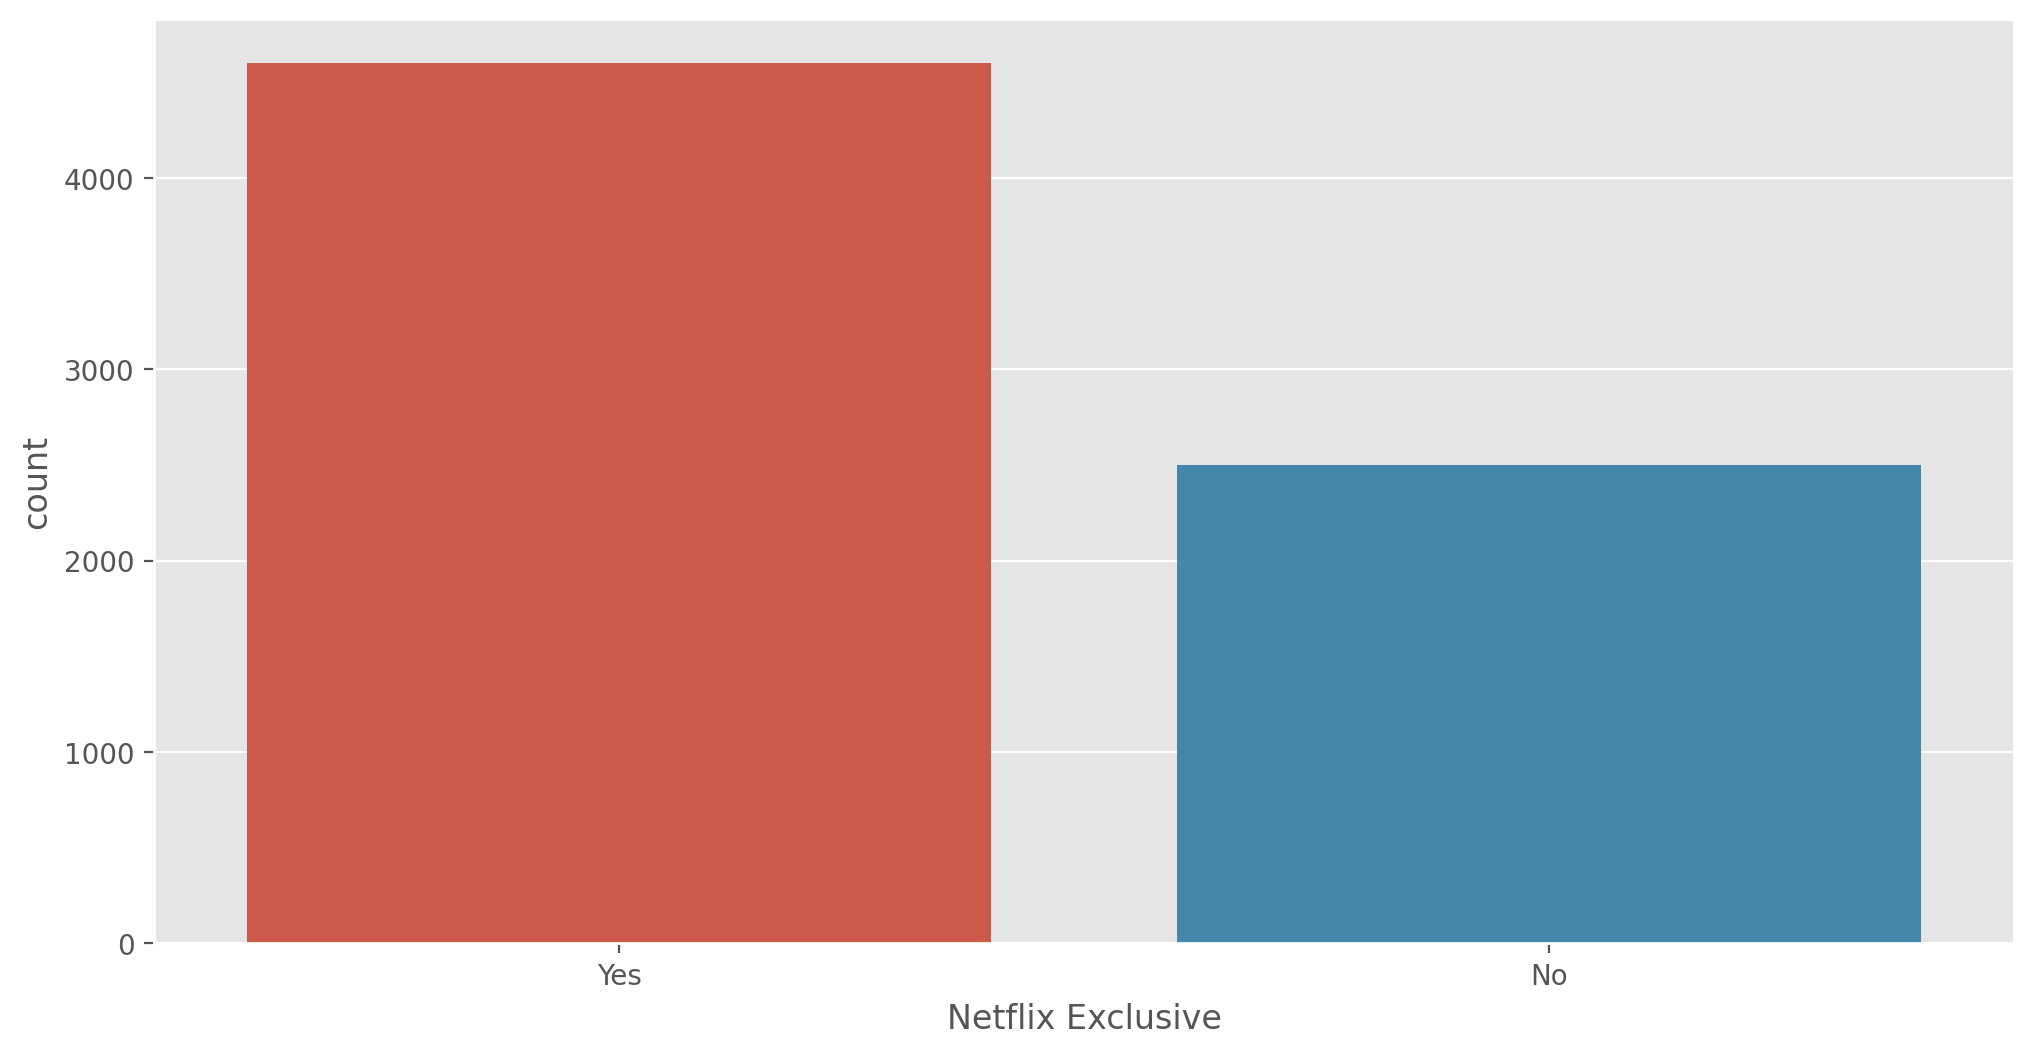

In [9]:
#Printing count value of Netflix exclusive
print(df['Netflix Exclusive'].value_counts())
plt.figure(figsize=(12,6), dpi = 200)
sns.countplot(x = 'Netflix Exclusive', data = df)

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64


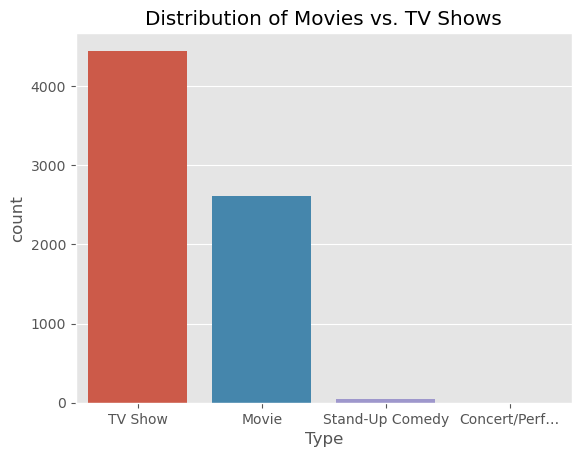

In [10]:
# Distribution of Content Types
print(df['Type'].value_counts())
sns.countplot(x='Type', data=df)
plt.title('Distribution of Movies vs. TV Shows')
plt.show()

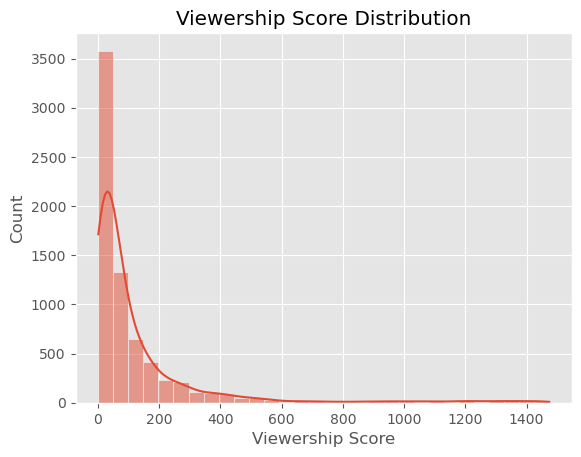

In [11]:
# Viewership Score Analysis
sns.histplot(df['Viewership Score'], bins=30, kde=True)
plt.title('Viewership Score Distribution')
plt.show()

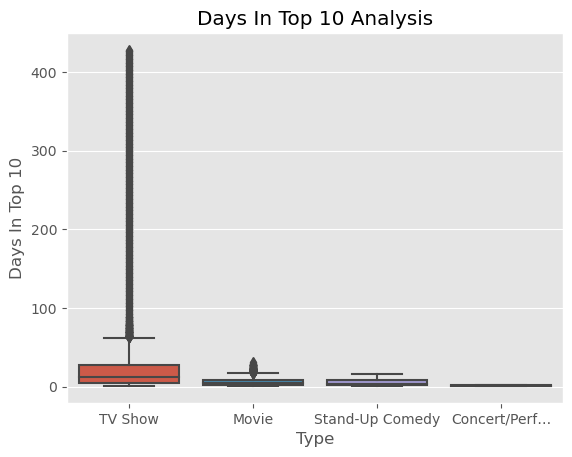

In [12]:
# Days In Top 10 Analysis
sns.boxplot(x='Type', y='Days In Top 10', data=df)
plt.title('Days In Top 10 Analysis')
plt.show()

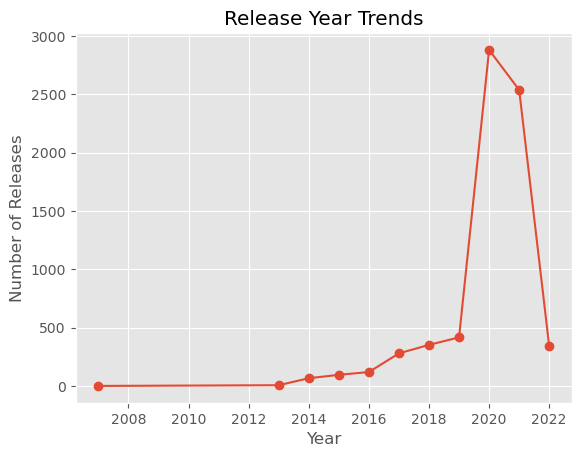

In [13]:
# Release Date Trends
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Release Year'] = df['Netflix Release Date'].dt.year
release_year_counts = df['Release Year'].value_counts().sort_index()
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.title('Release Year Trends')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

**Overall Summary of Netflix Dataset Analysis:**

**1. Dataset Overview:**
   - The dataset consists of 7100 entries, capturing information about content on Netflix.
   - Key columns include rank, title, content type, Netflix exclusivity, release date, days in the top 10, and viewership score.

**2. Content Types and Distribution:**
   - The majority of entries are TV shows (4446) and movies (2611), with fewer stand-up comedy specials and concert performances.
   - The content distribution reflects Netflix's effort to cater to diverse entertainment preferences.

**3. Netflix Exclusive Content:**
   - A substantial portion of the content (4599 entries) is marked as exclusive to Netflix.
   - The presence of Netflix-exclusive content suggests a strategy to offer unique and proprietary material to subscribers.

**4. Viewership Score Distribution:**
   - The viewership scores exhibit a diverse distribution, ranging from low to high values.
   - There is a noticeable peak in the distribution, suggesting a common level of popularity among many titles.
   - The long tail towards higher viewership scores indicates the presence of outliers—content with exceptionally high popularity.
   
**5. Release Year Trends:**
   - A line plot of release year trends shows a gradual increase in the number of content releases over time.
   - The upward trajectory suggests continuous growth in Netflix's content library.



# 2.	Starbucks Analysis

In [3]:
#Load datasets starbucks-menu-nutrition-drinks.csv
df_drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
df_drinks.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [4]:
# Rename the column 'Unnamed: 0' to 'Items' in the DataFrame df_drinks
df_drinks.rename(columns={'Unnamed: 0':'Items'}, inplace=True)

# Display the count of null values in each column of the df_drinks DataFrame
df_drinks.isnull().sum()

Items        0
Calories     0
Fat (g)      0
Carb. (g)    0
Fiber (g)    0
Protein      0
Sodium       0
dtype: int64

In [5]:
# Display information about the DataFrame df_drinks, including column data types, non-null counts, and memory usage
df_drinks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Items      177 non-null    object
 1   Calories   177 non-null    object
 2   Fat (g)    177 non-null    object
 3   Carb. (g)  177 non-null    object
 4   Fiber (g)  177 non-null    object
 5   Protein    177 non-null    object
 6   Sodium     177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [6]:
# Print a title for the analysis
print('Drinks Description Analysis')

# Display a statistical summary of the df_drinks DataFrame, including descriptive statistics for all columns
df_drinks.describe(include='all')

Drinks Description Analysis


,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,177,177,177,177,177,177,177
unique,154,30,15,34,8,17,25
top,Tazo® Bottled Organic Iced Black Tea,-,-,-,-,-,-
freq,2,85,85,85,85,85,85


In [7]:
# Print the count of duplicated rows in the df_drinks DataFrame
print(df_drinks.duplicated().sum())

22


In [8]:
# Remove duplicate rows from the df_drinks DataFrame in place
df_drinks.drop_duplicates(inplace=True)

In [9]:
# Display the column names of the df_drinks DataFrame
df_drinks.columns

Index(['Items', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [10]:
# Count the number of unique values in the 'Items' column of the df_drinks DataFrame
df_drinks.Items.nunique()


154

In [11]:
# Display the shape (number of rows and columns) of the df_drinks DataFrame
df_drinks.shape

(155, 7)

In [12]:
# Print column data types
print(df_drinks.dtypes)

# Display unique value counts per column
df_drinks.nunique()

Items        object
Calories     object
Fat (g)      object
Carb. (g)    object
Fiber (g)    object
Protein      object
Sodium       object
dtype: object


Items        154
Calories      30
Fat (g)       15
Carb. (g)     34
Fiber (g)      8
Protein       17
Sodium        25
dtype: int64

In [13]:
# Display unique values for numeric columns in num_drinks list
num_drinks = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
for c in num_drinks:
    u_v = df_drinks[c].unique()
    print(c, ':', u_v)

Calories : ['45' '-' '80' '60' '110' '0' '130' '140' '150' '70' '120' '30' '90' '210'
 '200' '50' '10' '5' '320' '430' '190' '290' '250' '260' '180' '230' '300'
 '360' '350' '280']
Fat (g) : ['0' '-' '2.5' '5' '6' '9' '26' '7' '8' '4' '4.5' '1' '11' '0.5' '2']
Carb. (g) : ['11' '-' '18' '14' '28' '0' '21' '23' '19' '15' '38' '35' '37' '17' '31'
 '8' '24' '27' '33' '34' '13' '2' '5' '47' '45' '42' '12' '40' '32' '36'
 '30' '53' '64' '60']
Fiber (g) : ['0' '-' '1' '2' '4' '5' '8' '7']
Protein : ['0' '-' '5' '20' '1' '14' '12' '13' '8' '10' '11' '9' '7' '3' '15' '4'
 '16']
Sodium : ['10' '-' '5' '0' '65' '90' '15' '115' '120' '20' '25' '160' '170' '140'
 '100' '150' '180' '95' '190' '40' '240' '200' '220' '135' '130']


In [14]:
# Count occurrences of unique combinations for numeric columns in num_drinks
df_drinks[num_drinks].value_counts()

Calories  Fat (g)  Carb. (g)  Fiber (g)  Protein  Sodium
-         -        -          -          -        -         80
5         0        0          0          1        10         4
140       0        35         0          0        10         4
30        0        8          0          0        5          3
130       2.5      21         0          5        65         2
                                                            ..
110       0        28         0          0        5          1
260       9        34         0          11       180        1
280       2.5      60         2          4        220        1
290       8        42         4          13       140        1
260       6        40         0          11       150        1
Length: 61, dtype: int64

In [15]:
# Convert specified numeric columns in num_drinks to numeric type, handling errors by coercing to NaN
df_drinks[num_drinks] = df_drinks[num_drinks].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Display updated data types after conversion
df_drinks.dtypes


Items         object
Calories     float64
Fat (g)      float64
Carb. (g)    float64
Fiber (g)    float64
Protein      float64
Sodium       float64
dtype: object

In [16]:
df_drinks

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
1,Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
2,Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
3,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320.0,5.0,53.0,8.0,20.0,170.0
173,Strawberry Smoothie,300.0,2.0,60.0,7.0,16.0,130.0
174,Ginger Ale,NaN,NaN,NaN,NaN,NaN,NaN
175,Lemon Ale,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Distribution of Calories in Drinks')

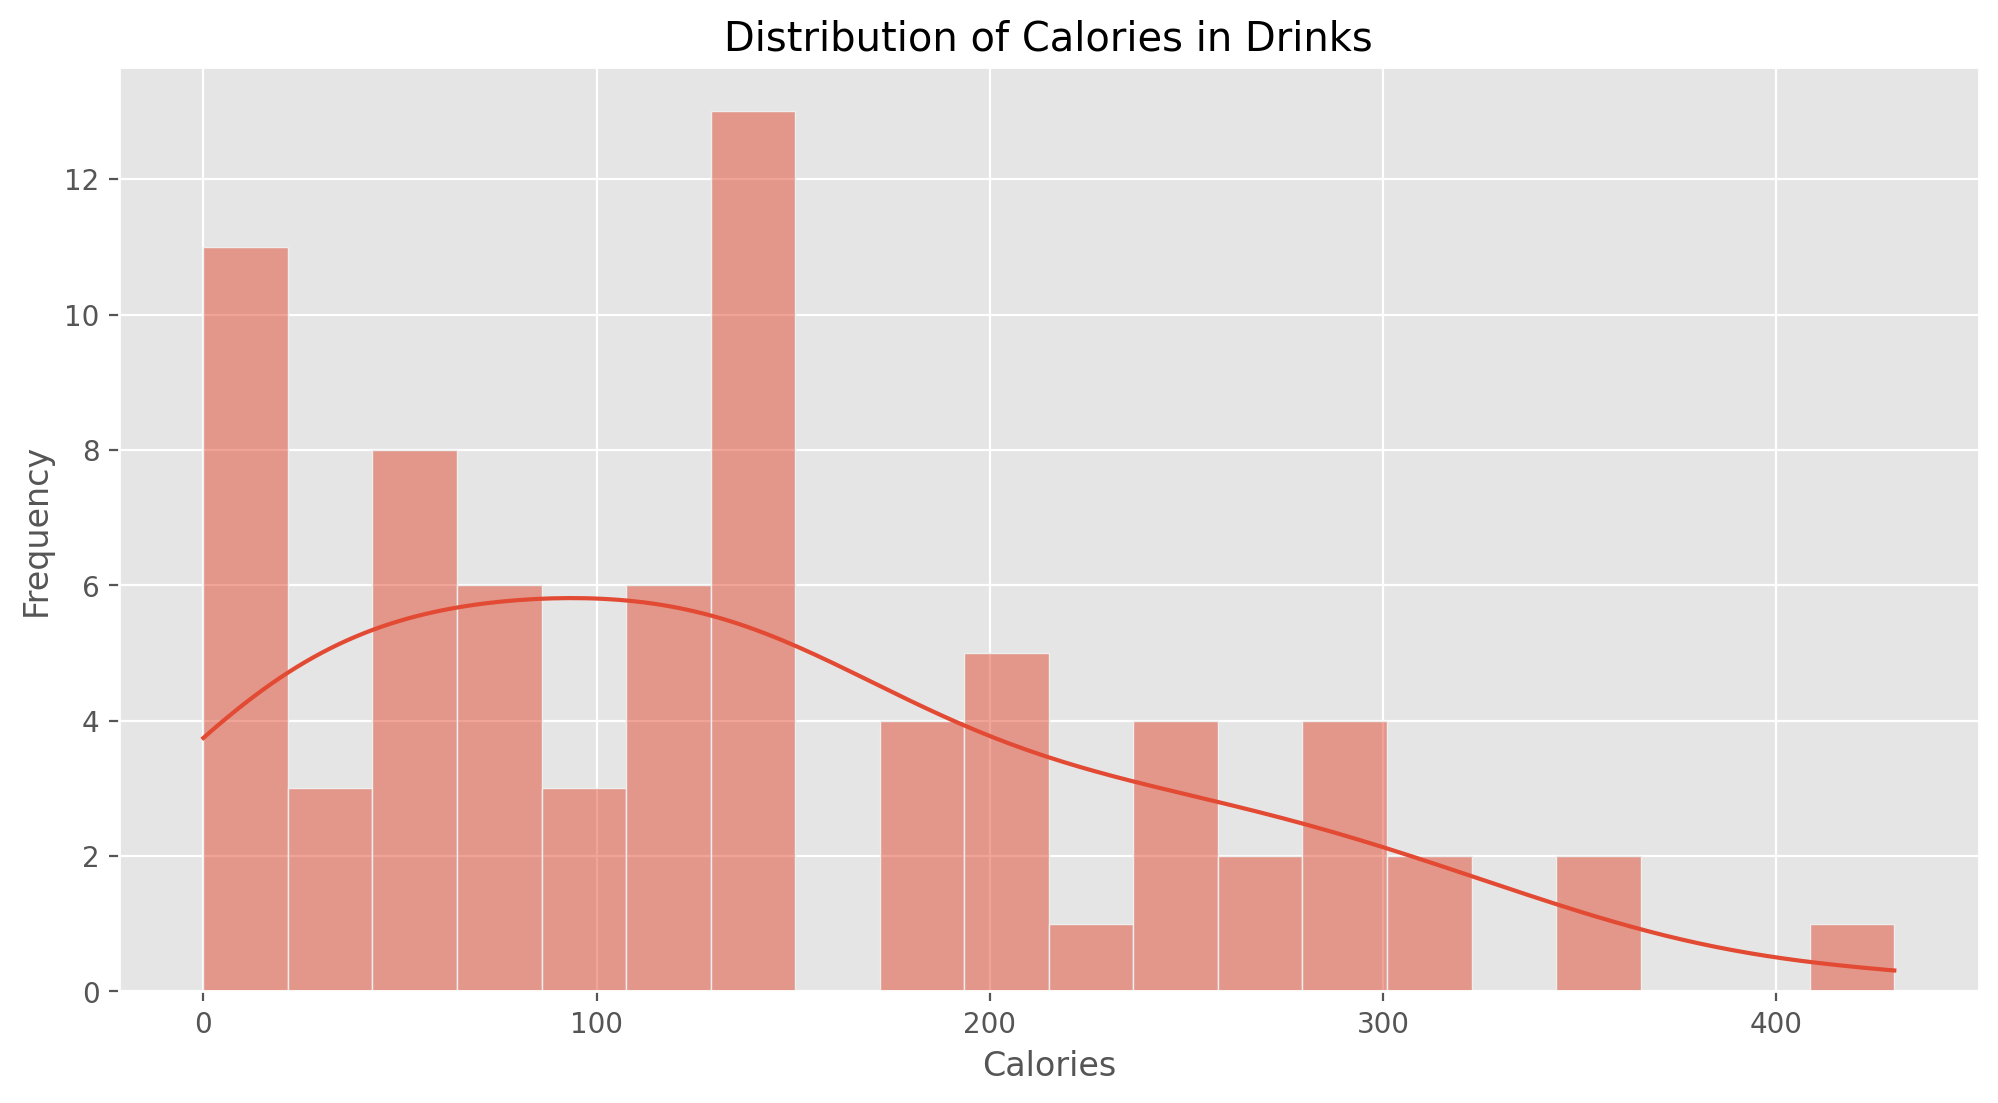

In [17]:
# Create a histogram plot for the 'Calories' column in df_drinks
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_drinks['Calories'], bins=20, kde=True)
plt.xlabel("Calories")
plt.ylabel('Frequency')
plt.title('Distribution of Calories in Drinks')



Distribution of Numerical Variables:


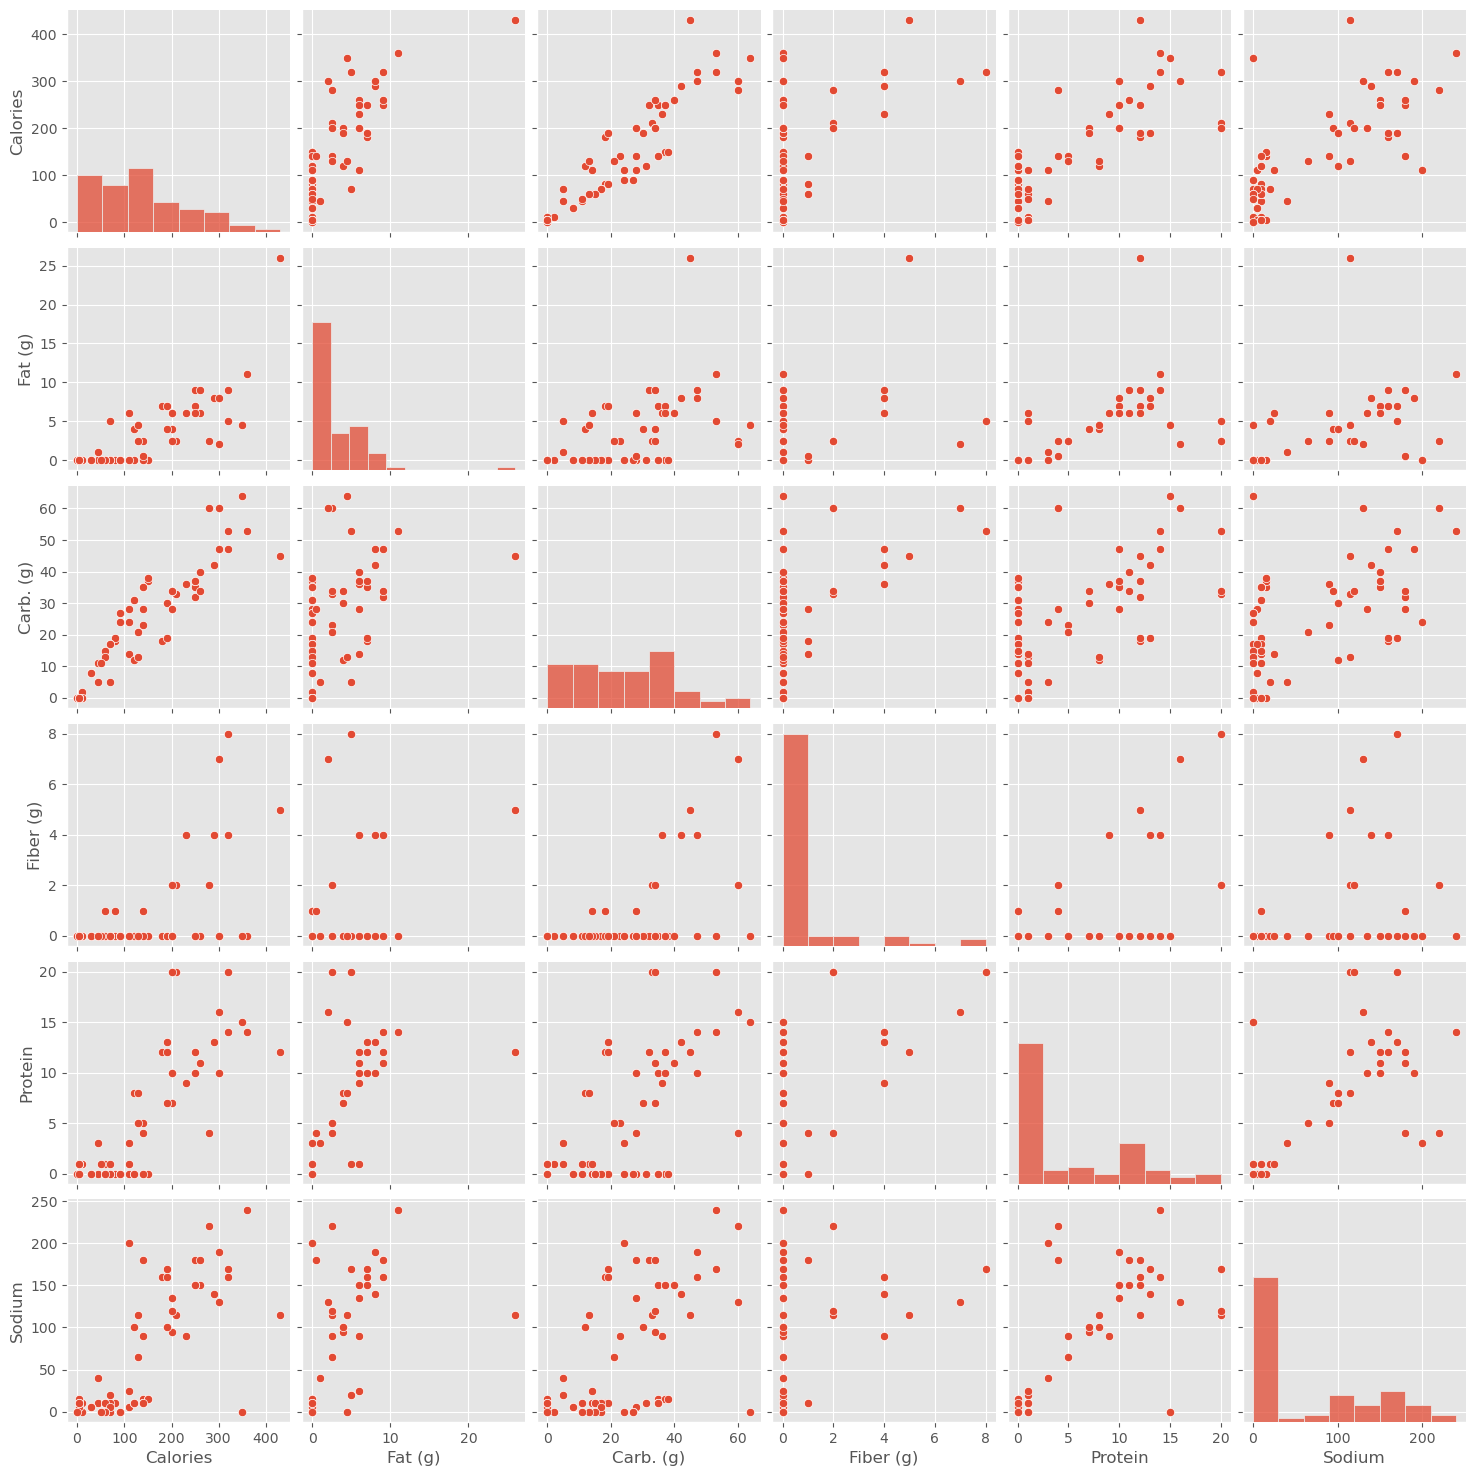

In [19]:
#Distribution of Numerical Variables
numerical_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
print("\nDistribution of Numerical Variables:")
sns.pairplot(df_drinks[numerical_columns])
plt.show()

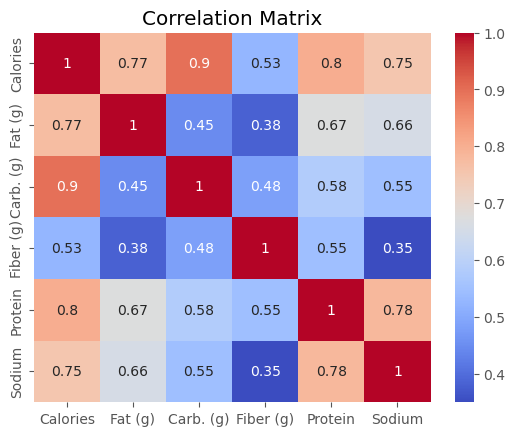

In [20]:
#Checking Correlations of numerical variables
corr_matrix = df_drinks[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

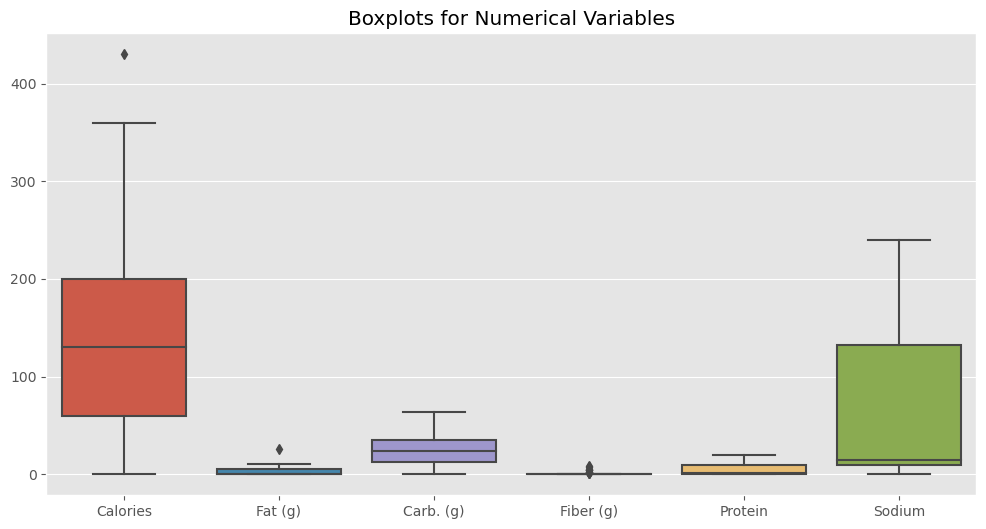

In [21]:
# Create a boxplot for numerical columns in df_drinks
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_drinks[numerical_columns])
plt.title('Boxplots for Numerical Variables')
plt.show()

In [33]:
df_food = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')
df_food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [22]:
# Read a CSV file containing Starbucks menu nutrition data for food items
df_food = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')

# Display the first few rows of the df_food DataFrame
df_food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [23]:
# Display information about the df_food DataFrame, including column data types, non-null counts, and memory usage
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    113 non-null    object 
 1    Calories     113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [24]:
# Print a title for the analysis
print('Food Description Analysis')

# Display a statistical summary of the df_food DataFrame
df_food.describe()

Food Description Analysis


,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.353982,41.486726,2.849558,11.469027
std,127.710685,8.297397,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


In [25]:
# Print the count of duplicated rows in the df_food DataFrame
print(df_food.duplicated().sum())

0


In [26]:
# Print data types of each column in df_food
print(df_food.dtypes)

# Display the number of unique values in each column of the df_food DataFrame
df_food.nunique()

Unnamed: 0       object
 Calories         int64
 Fat (g)        float64
 Carb. (g)        int64
 Fiber (g)        int64
 Protein (g)      int64
dtype: object


Unnamed: 0      113
 Calories        44
 Fat (g)         35
 Carb. (g)       49
 Fiber (g)       13
 Protein (g)     29
dtype: int64

In [27]:
# Display the column names of the df_food DataFrame
df_food.columns


Index(['Unnamed: 0', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [28]:
# List of selected columns related to nutrition in food items
col_food = [' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)']

Text(0.5, 1.0, 'Distribution of Calories in Foods')

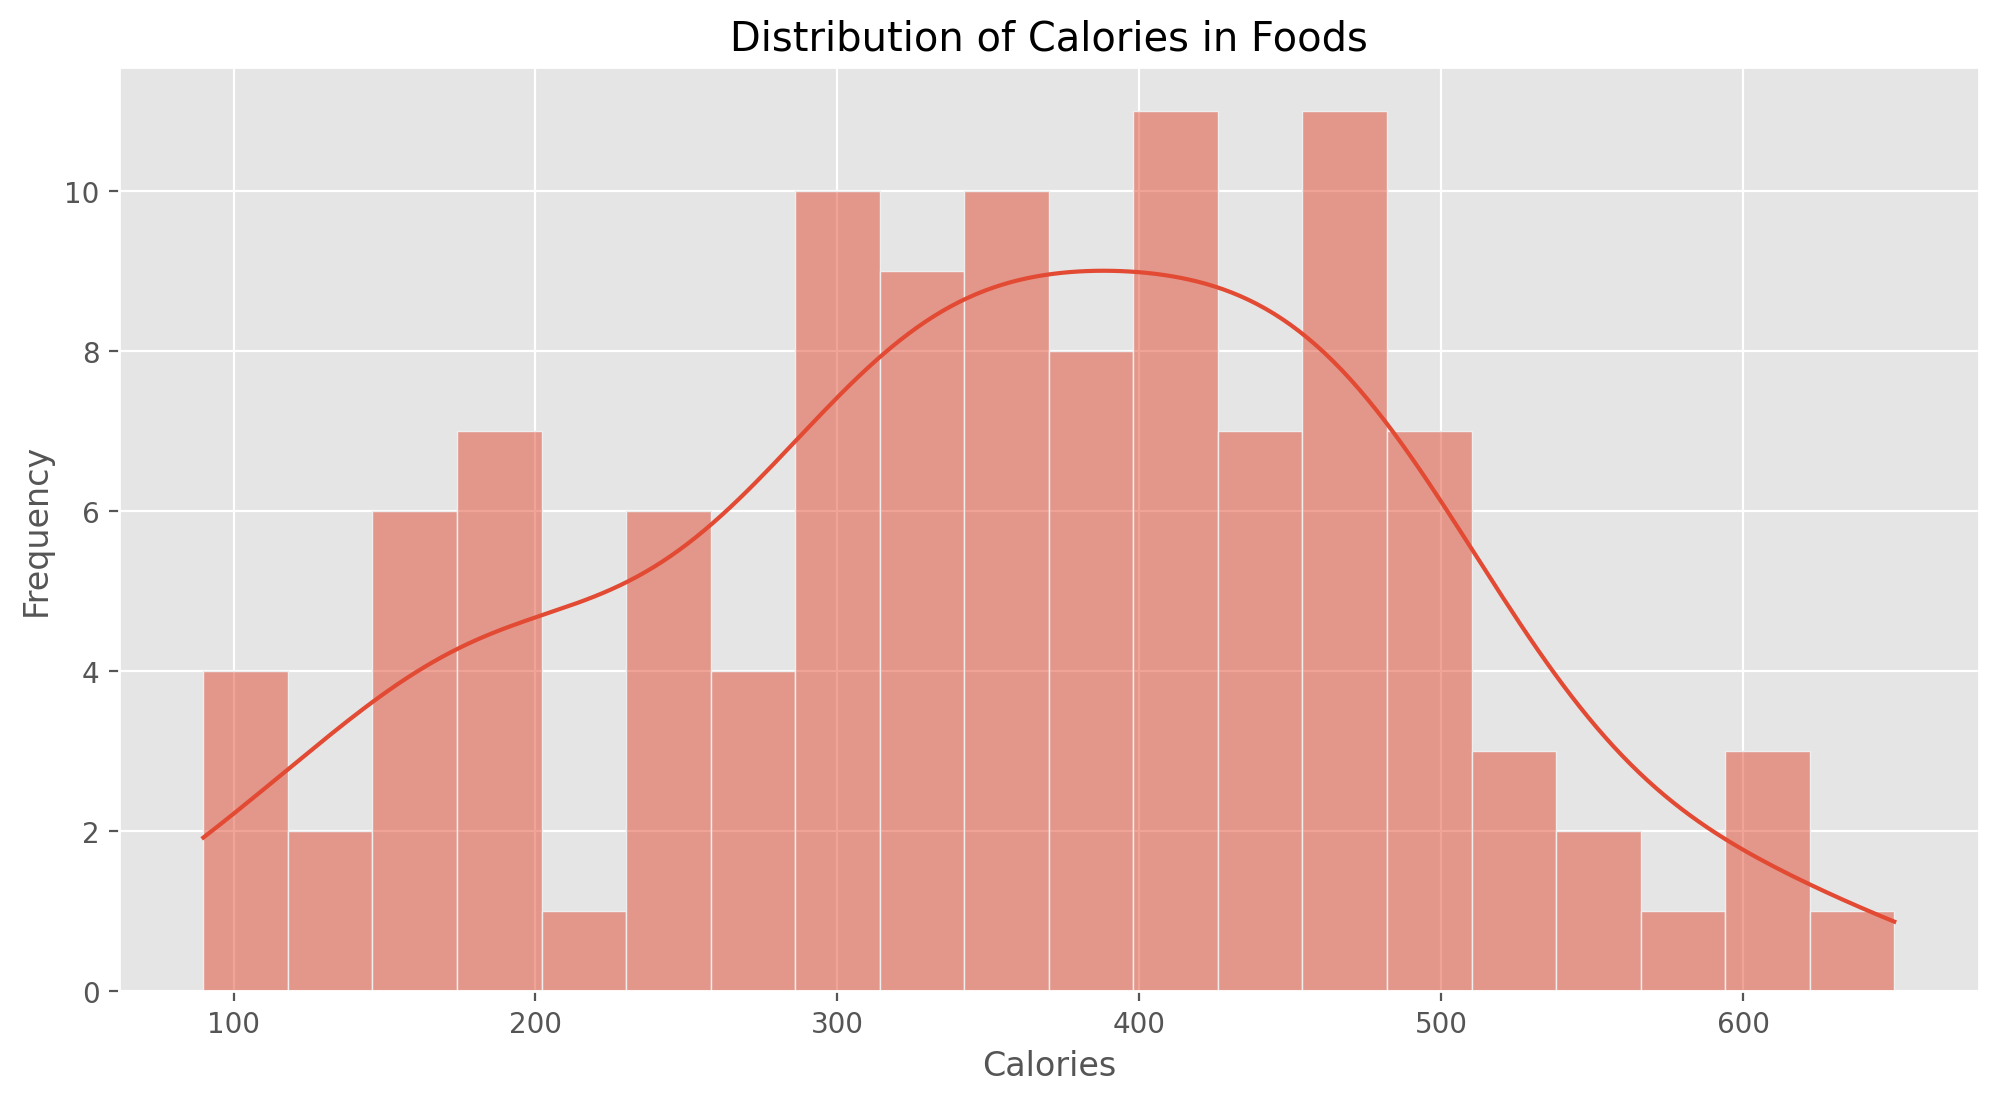

In [42]:
# Create a histogram plot for the 'Calories' column in df_food
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_food[' Calories'], bins=20, kde=True)
plt.xlabel("Calories")
plt.ylabel('Frequency')
plt.title('Distribution of Calories in Foods')

<Figure size 2400x2400 with 0 Axes>

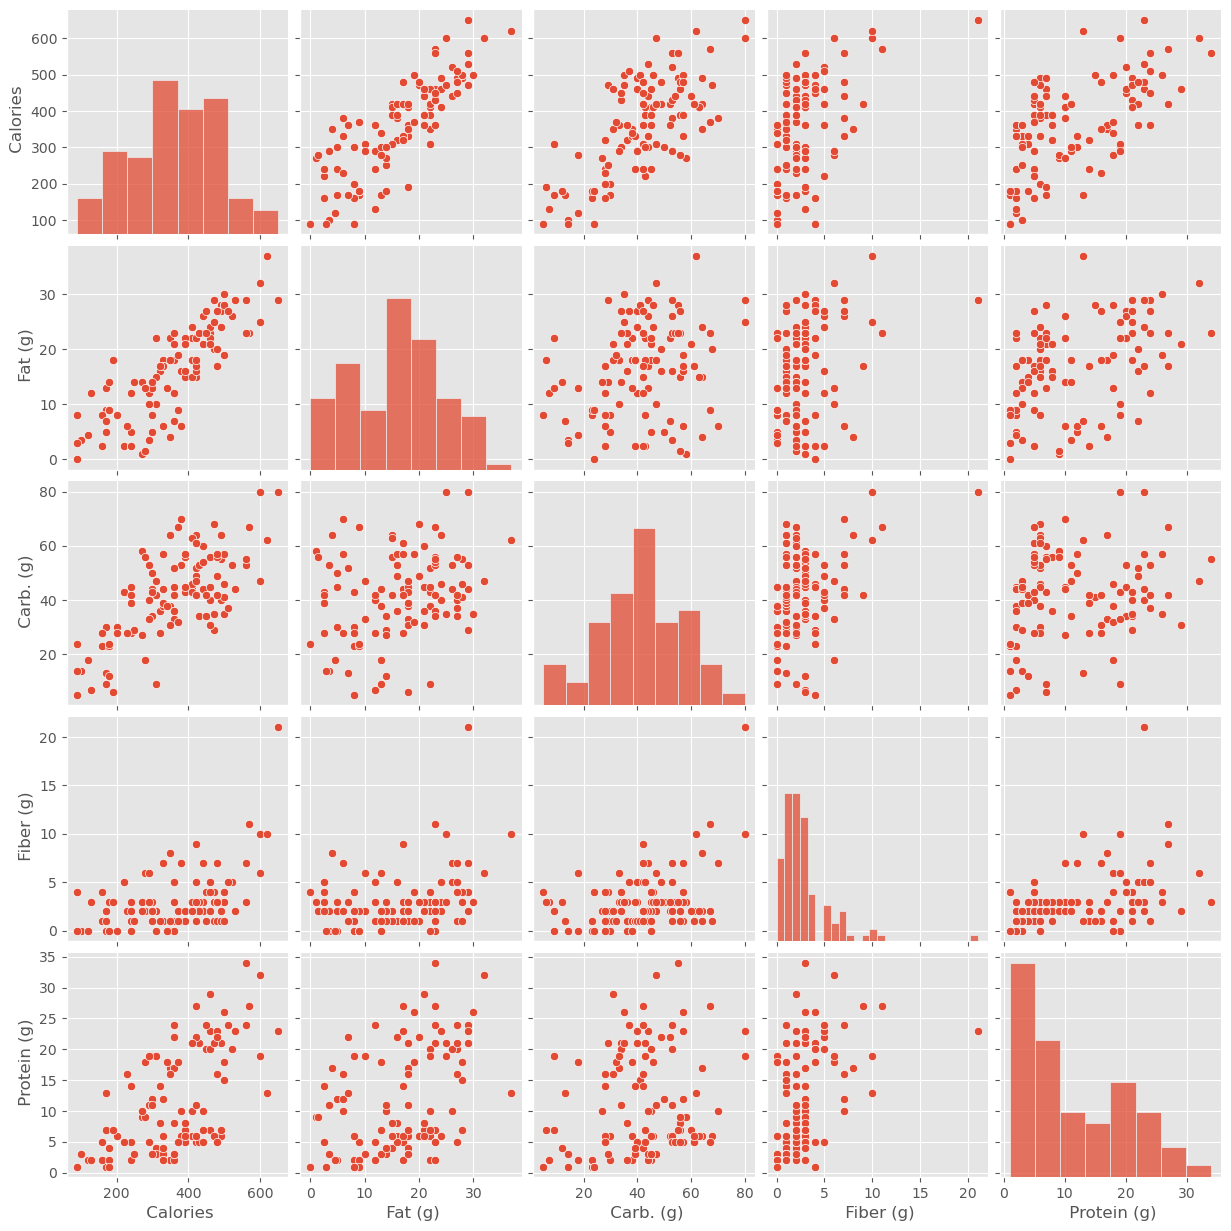

In [29]:
# Create a pairplot to visualize relationships between selected nutritional columns in df_food
col_food = [' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)']
plt.figure(figsize=(12, 12), dpi=200)
sns.pairplot(df_food[col_food], palette='skublue')

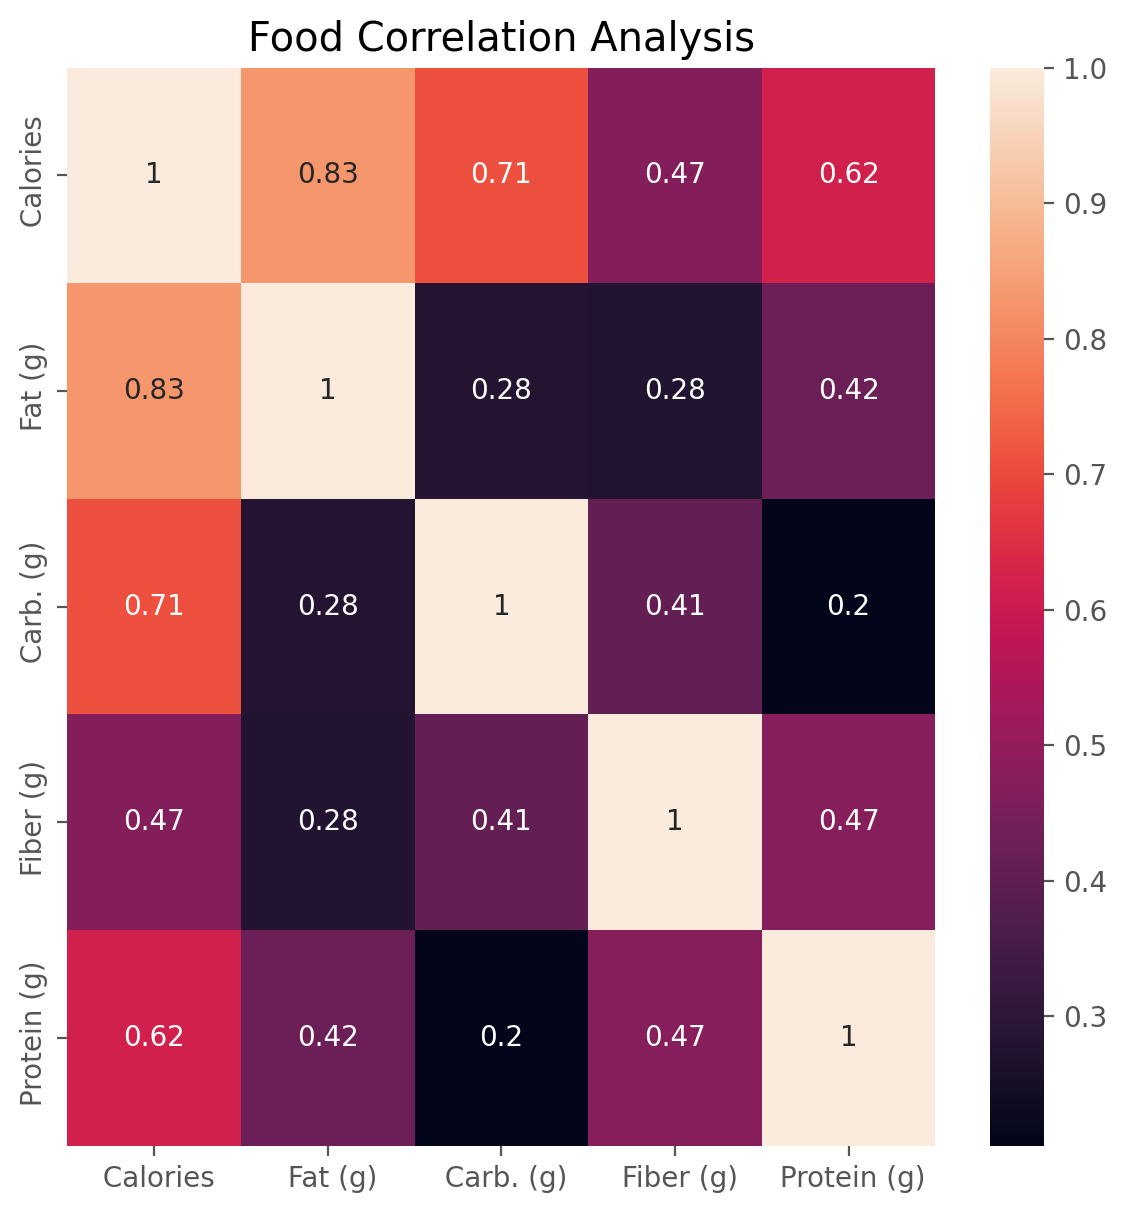

In [44]:
# Create a heatmap to visualize correlation between nutritional columns in df_food
corr_matrix = df_food[col_food].corr()
plt.figure(figsize=(7, 7), dpi=200)
sns.heatmap(corr_matrix, annot=True)
plt.title("Food Correlation Analysis")
plt.show()

In [31]:
# Read a CSV file containing expanded Starbucks drink menu data
df_expanded = pd.read_csv('starbucks_drinkMenu_expanded.csv')

# Display the first few rows of the df_expanded DataFrame
df_expanded.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [32]:
# Display the count of null values in each column of the df_expanded DataFrame
df_expanded.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [33]:
# Display information about the df_expanded DataFrame, including column data types, non-null counts, and memory usage
df_expanded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [48]:
# Print a title for the analysis
print('Expanded Drinks Description Analysis')

# Display a statistical summary of the df_expanded DataFrame
df_expanded.describe()

Expanded Drinks discribtion Analysis


,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [34]:
# Print the count of duplicated rows in the df_expanded DataFrame
print(df_expanded.duplicated().sum())

0


In [35]:
# Display the shape (number of rows and columns) of the df_expanded DataFrame
df_expanded.shape

(242, 18)

In [36]:
# Display the count of unique values in the 'Beverage_category' column of the df_expanded DataFrame
df_expanded['Beverage_category'].value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

In [37]:
# Display the column names of the df_expanded DataFrame
df_expanded.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [38]:
# Print data types of each column in df_expanded
print(df_expanded.dtypes)

# Display the number of unique values in each column of the df_expanded DataFrame
df_expanded.nunique()

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object


Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

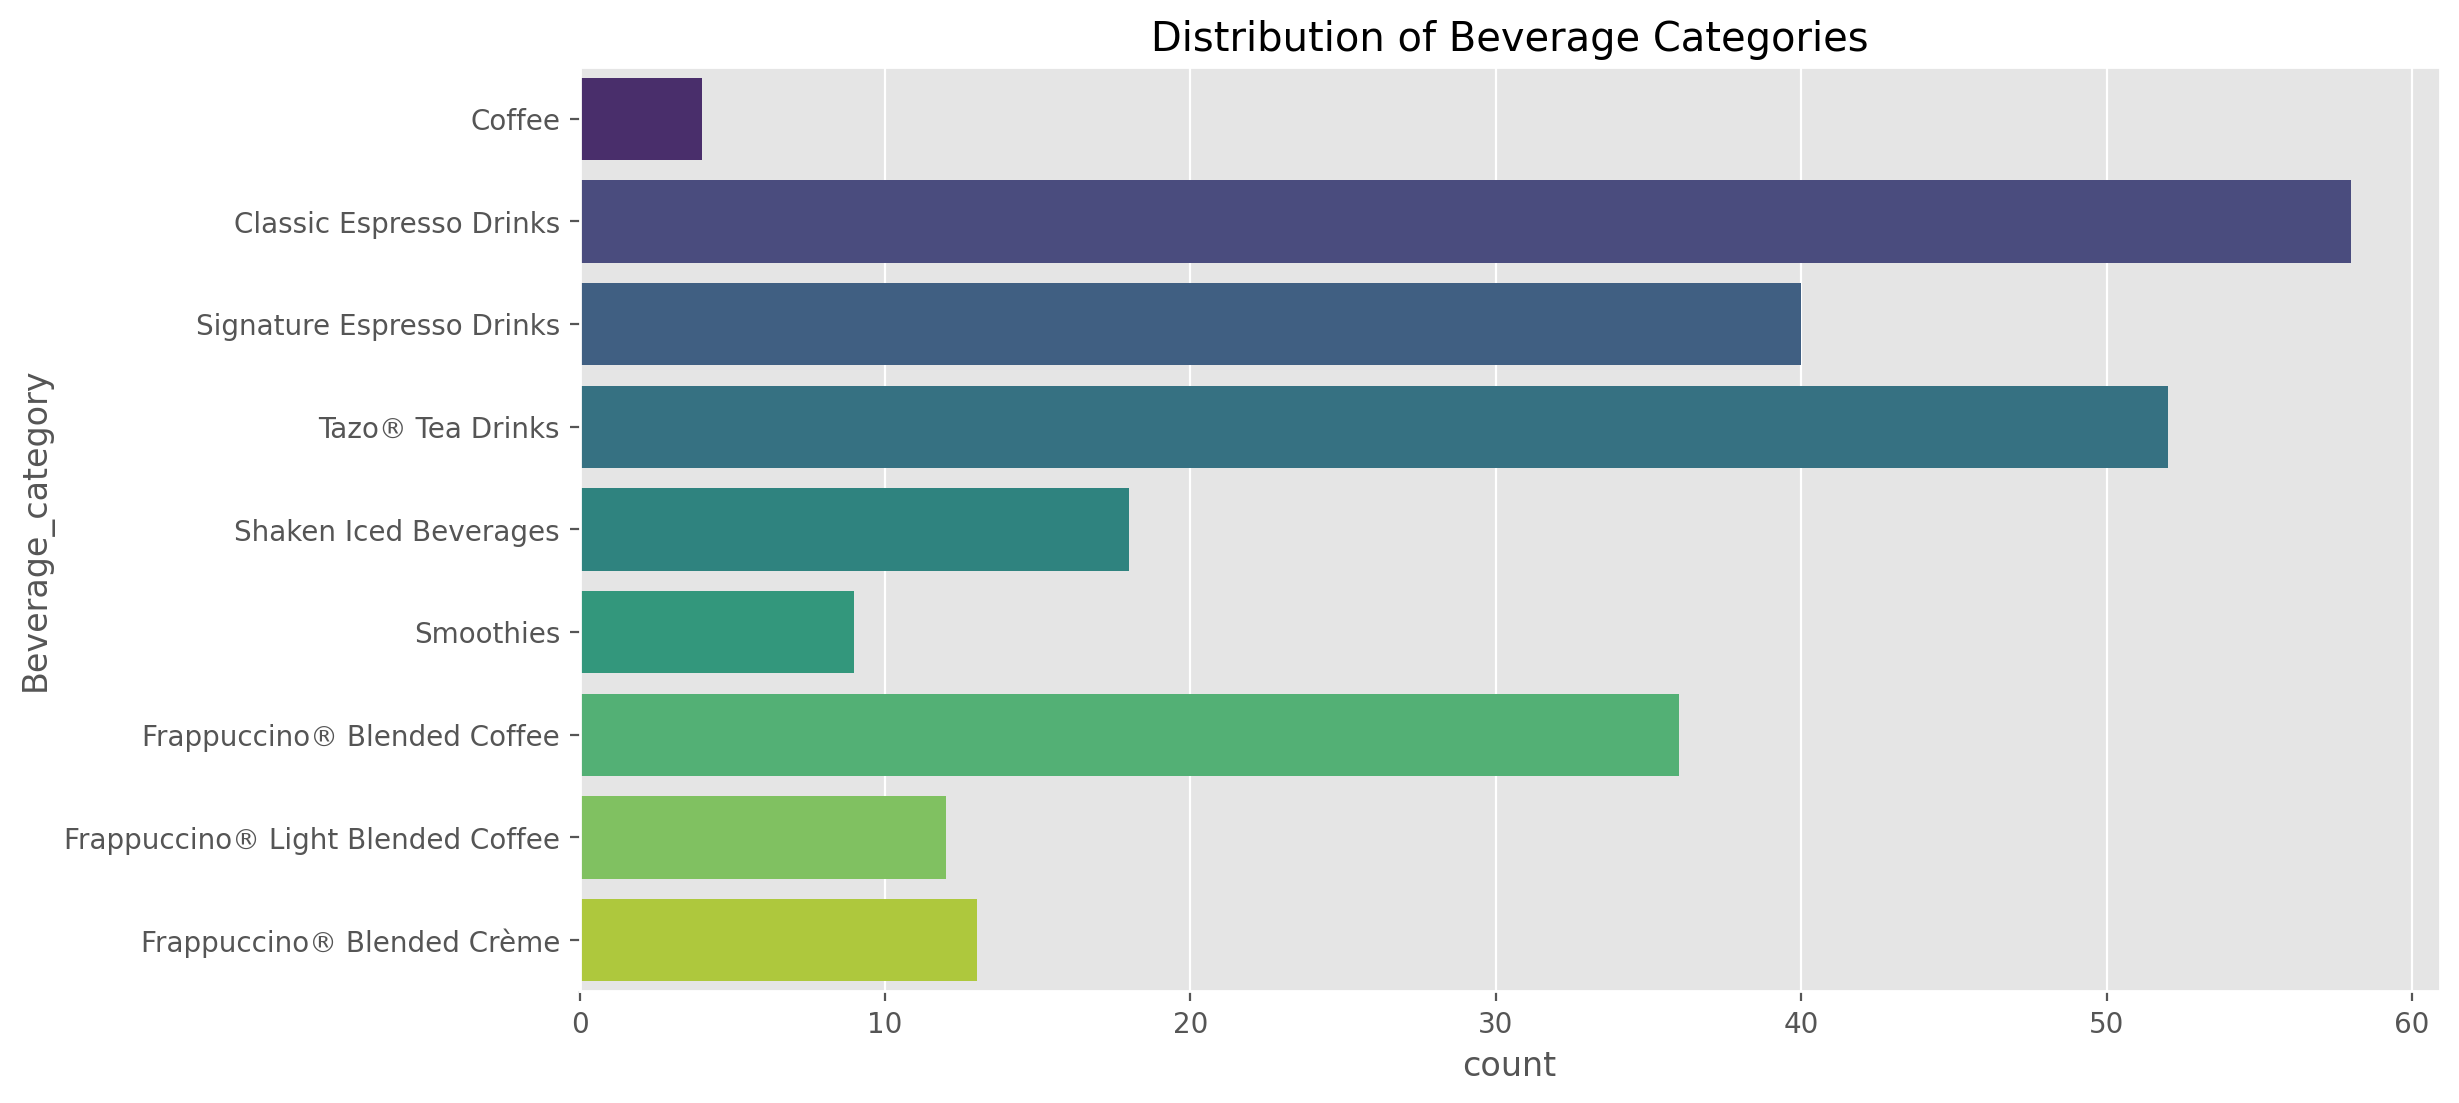

In [39]:
# Create a countplot to visualize the distribution of Beverage Categories in df_expanded
plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(y='Beverage_category', data=df_expanded, palette='viridis')
plt.title("Distribution of Beverage Categories")
plt.show()

**Overall Conclusion :** Summarize key findings from the analysis, insights gained, and recommendations.


2 - The dataset primarily consists of various beverage categories, with a significant number of coffee-based drinks.

3 - The distribution of calories in drinks shows that most drinks have moderate calorie content, with a few outliers.

4 - There is a positive correlation between total fat and calories, indicating that drinks with higher fat content tend to have more calories.

5 - The top ingredients in the food menu include...

6 (Include other important observations and insights)
